In [17]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 25, 10

In [14]:
def handle_nan(pts):
    pt_copy = []
    for i, pt in enumerate(pts):
        if not pt:
            pt_copy.append(pt_copy[-1])
        else:
            pt_copy.append(pt)
    return pt_copy

In [15]:
POINTS_PATH = "/mnt/disk1/CNUH/resize_eye_centerpoints"
video_name = "001"

pt1s = pickle.load(open(f"{POINTS_PATH}/{video_name}/eye1.pkl", "rb"))
pt2s = pickle.load(open(f"{POINTS_PATH}/{video_name}/eye2.pkl", "rb"))
is_detected1 = pickle.load(open(f"{POINTS_PATH}/{video_name}/is_detected1.pkl", "rb"))
is_detected2 = pickle.load(open(f"{POINTS_PATH}/{video_name}/is_detected2.pkl", "rb"))

pt1s = np.array(handle_nan(pt1s))
pt2s = np.array(handle_nan(pt2s))

In [16]:
diff1s = np.array([0]) + np.linalg.norm(pt1s[1:] - pt1s[:-1], axis=1)
diff2s = np.array([0]) + np.linalg.norm(pt2s[1:] - pt2s[:-1], axis=1)

In [27]:
set_df = pd.DataFrame({
    'dist1': diff1s,
    'dist2': diff2s,
})

pt_df = pd.DataFrame({
    'eye1_x': [p[0] for p in pt1s],
    'eye1_y': [p[1] for p in pt1s],
    'eye2_x': [p[0] for p in pt2s],
    'eye2_y': [p[1] for p in pt2s],
})

In [18]:
import pandas as pd
sns.set(style="whitegrid")
label_df = pd.read_excel("/mnt/disk1/CNUH/CNUH/final_labels.xlsx")

In [21]:
def get_nystagmus_positions(meta_df, idx):
    start_end_suffices = [''] + [f'.{i}' for i in range(1, 8)]
    starts = ['start'+suf for suf in start_end_suffices]
    ends = ['end'+suf for suf in start_end_suffices]
    start_ends = [meta_df[meta_df['No.'] == int(idx)][["start"+start_end_suffices[i], "end"+start_end_suffices[i]]].values[0] for i in range(8)]
    start_ends = [val for val in start_ends if not (pd.isna(val[0]) or pd.isna(val[1]))]

    return start_ends

In [24]:
def get_experiment_positions(meta_df, idx):
    start_cols = np.array([c for c in meta_df.columns if c.endswith('start') and c != 'start'])
    end_cols = np.array([c for c in meta_df.columns if c.endswith('end') and c != 'end'])

    expr_starts = meta_df[meta_df['No.'] == int(idx)][start_cols].values[0]
    expr_ends = meta_df[meta_df['No.'] == int(idx)][end_cols].values[0]

    filter_ids = [i for i in range(len(start_cols)) if not pd.isna(start_cols[i]) and not pd.isna(end_cols[i])]
    expr_starts = expr_starts[filter_ids]
    expr_ends = expr_ends[filter_ids]

    return expr_starts, expr_ends

In [25]:
def draw_plot(data, meta_df, idx, is_detected, from_to=None):
    expr_stimes, expr_etimes = get_experiment_positions(meta_df, idx)
    nyst_pos = get_nystagmus_positions(meta_df, idx)
    
    if not from_to:
        g = sns.lineplot(data=data, palette='hls')
        for val in zip(list(expr_stimes), list(expr_etimes)):
            s, e = val[0], val[1]
            g.axvspan(xmin=s*30, xmax=e*30, facecolor='C1', alpha=0.3)
        for i, val in enumerate(start_ends):
            s, e = val[0], val[1]
            g.axvspan(xmin=s*30, xmax=e*30, facecolor='C0', alpha=0.3)
        for i, val in enumerate(is_detected):
            if not val:
                g.axvspan(xmin=i-1, xmax=i+1, facecolor='C2', alpha=0.3)

    if from_to:
        f, t = from_to
        g = sns.lineplot(data=data.values[f:t], palette='hls')
        
        for val in zip(list(expr_stimes), list(expr_etimes)):
            s, e = val[0]*30 -f, val[1]*30 -f
            if s >= 0 and e <= t-f:
                g.axvspan(xmin=s, xmax=e, facecolor='C1', alpha=0.3)
        for i, val in enumerate(nyst_pos):
            s, e = val[0]*30 -f, val[1]*30 -f
            print(s, e)
            if s >= 0 and e <= t-f:
                g.axvspan(xmin=s, xmax=e, facecolor='C0', alpha=0.3)
        for i, val in enumerate(is_detected[f:t]):
            if not val:
                g.axvspan(xmin=i-1, xmax=i+1, facecolor='C2', alpha=0.3)

300 480
3150 3420.0
6720.0 7020


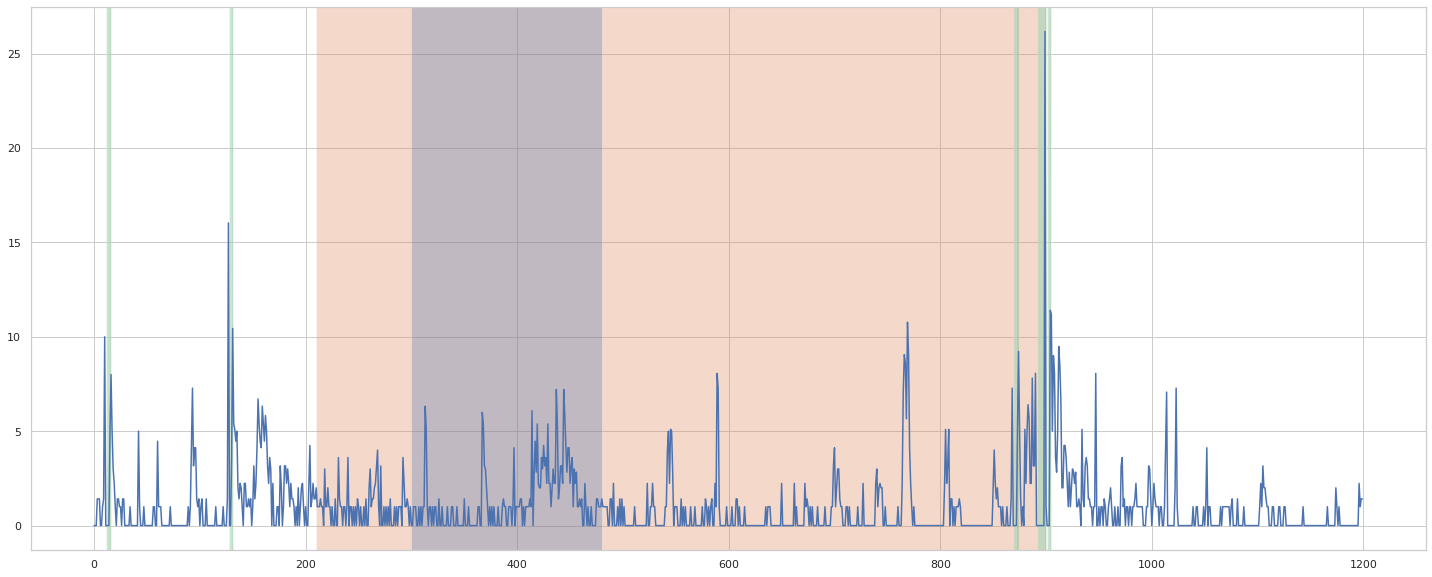

In [31]:
draw_plot(set_df['dist1'], label_df, video_name, is_detected1, (130*30, 170*30))
# draw_plot(pt_df[['eye1_x', 'eye1_y', 'eye2_x', 'eye2_y']], label_df, video_name, is_detected1, (352*30, 386*30))
# draw_plot(pt_df[['eye1_x', 'eye1_y', 'eye2_x', 'eye2_y']], label_df, video_name, is_detected1, (130*30, 170*30))
# draw_plot(set_df['dist1'], label_df, video_name, is_detected1)